<a href="https://colab.research.google.com/github/kristina-skoptsova/diplom/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [10]:
file = '/content/dataset_muiv.csv'
df = pd.read_csv(file)
df = pd.DataFrame(df)
df

,Направление,Год поступления,Количество поступивших,Сумма баллов,Сумма баллов за ВИ,Кол-во баллов за ИД,Возраст,Регион рождения,Уровень безработицы,Доля женщин,Доля преимущественного права,Доля наличия договора
0,1,1908,11,180.909091,76.090909,83.454545,25.636364,76.090909,33.727273,0.454545,0.181818,0.000000
1,1,1909,11,181.636364,69.272727,82.727273,24.545455,69.272727,29.909091,0.214286,0.000000,0.214286
2,1,1910,11,173.636364,63.181818,83.181818,23.820205,63.181818,27.000000,0.210526,0.105263,0.052632
3,1,1911,11,184.181818,72.454545,82.909091,26.913137,72.454545,32.636364,0.312500,0.125000,0.000000
4,1,1912,11,193.454545,69.545455,82.363636,26.636364,69.545455,29.909091,0.113636,0.045455,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...
5962,51,2020,19,183.210526,61.842105,80.105263,26.899422,61.842105,17.052632,0.333333,0.041667,0.291667
5963,51,2021,20,192.150000,70.600000,75.750000,26.301113,70.600000,17.850000,0.225806,0.032258,0.096774
5964,51,2022,20,181.950000,62.550000,77.050000,26.702225,62.550000,16.200000,0.916667,0.083333,0.166667
5965,51,2023,20,179.050000,69.900000,80.500000,24.903338,69.900000,18.800000,0.666667,0.000000,0.333333


In [11]:
columns_to_drop = ["Уровень безработицы", "Регион рождения", "Доля наличия договора"]
df = df.drop(columns=columns_to_drop)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Колонки, которые не нужно масштабировать
exclude_columns = ['Направление', 'Год поступления', 'Количество поступивших']
# Колонки для масштабирования
columns_to_scale = [col for col in df.columns if col not in exclude_columns]
# Применение RobustScaler
scaler = RobustScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

X = df.drop(columns=['Количество поступивших'])
y = df['Количество поступивших']

In [13]:
# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для оценки модели
def model_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 30)

In [14]:
# Случайный лес
print('Случайный лес:')
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
model_evaluation(model_rf, X_test, y_test)

# Градиентный бустинг
print('Градиентный бустинг:')
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
model_evaluation(model_gbr, X_test, y_test)

# XGBoost
print('XGBoost:')
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
model_evaluation(model_xgb, X_test, y_test)

Случайный лес:
MAE: 3.2186
R²: 0.8665
------------------------------
Градиентный бустинг:
MAE: 3.4307
R²: 0.8540
------------------------------
XGBoost:
MAE: 2.2972
R²: 0.9280
------------------------------


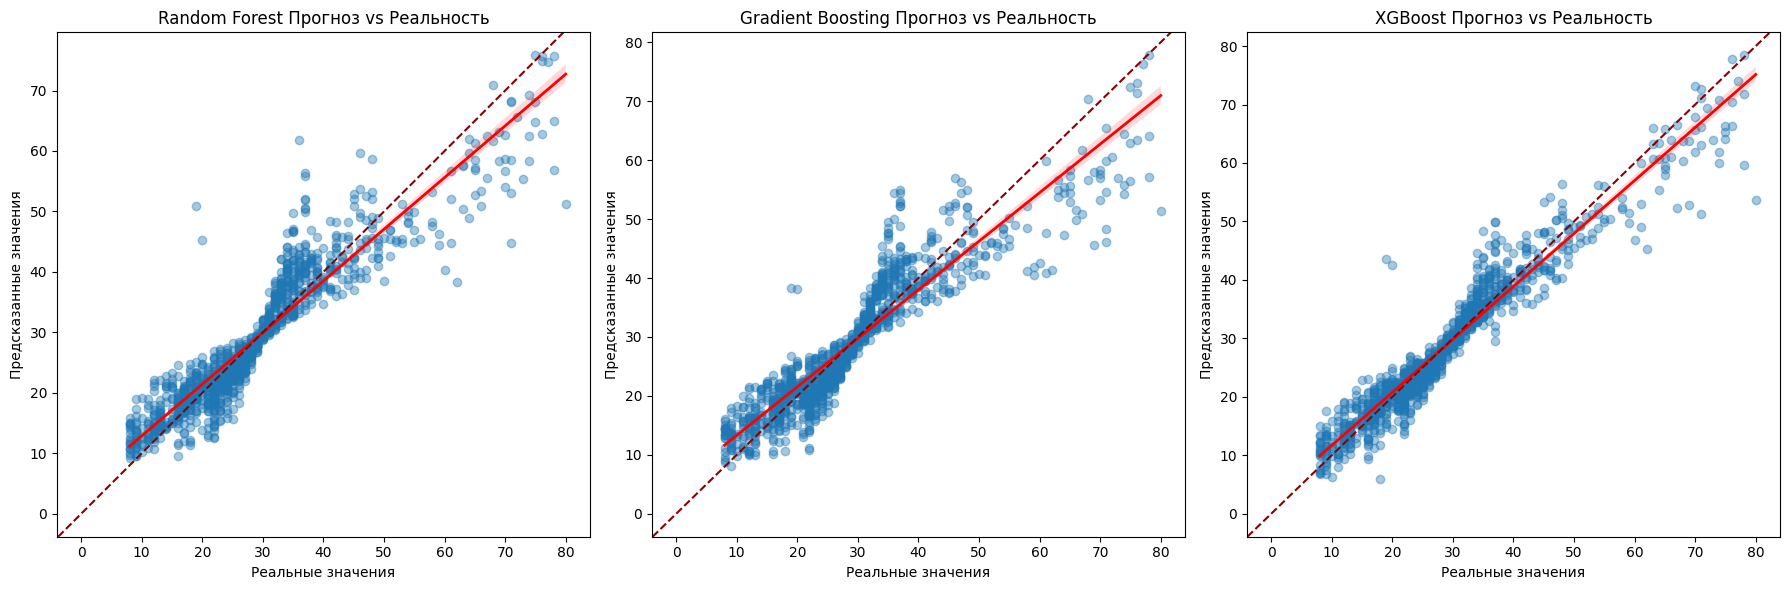

In [7]:
# Предсказание моделей
y_pred_rf = model_rf.predict(X_test)
y_pred_gbr = model_gbr.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

# График рассеивания
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models_pred = {
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gbr,
    'XGBoost': y_pred_xgb
}

for i, (model_name, preds) in enumerate(models_pred.items()):
    sns.regplot(x=y_test, y=preds, scatter_kws={'alpha':0.4},
                line_kws={'color':'red', 'lw':2}, ax=axes[i])
    axes[i].axline((0,0), (1,1), color='darkred', linestyle='--')
    axes[i].set_xlabel('Реальные значения')
    axes[i].set_ylabel('Предсказанные значения')
    axes[i].set_title(f'{model_name} Прогноз vs Реальность')

plt.tight_layout()
plt.show()

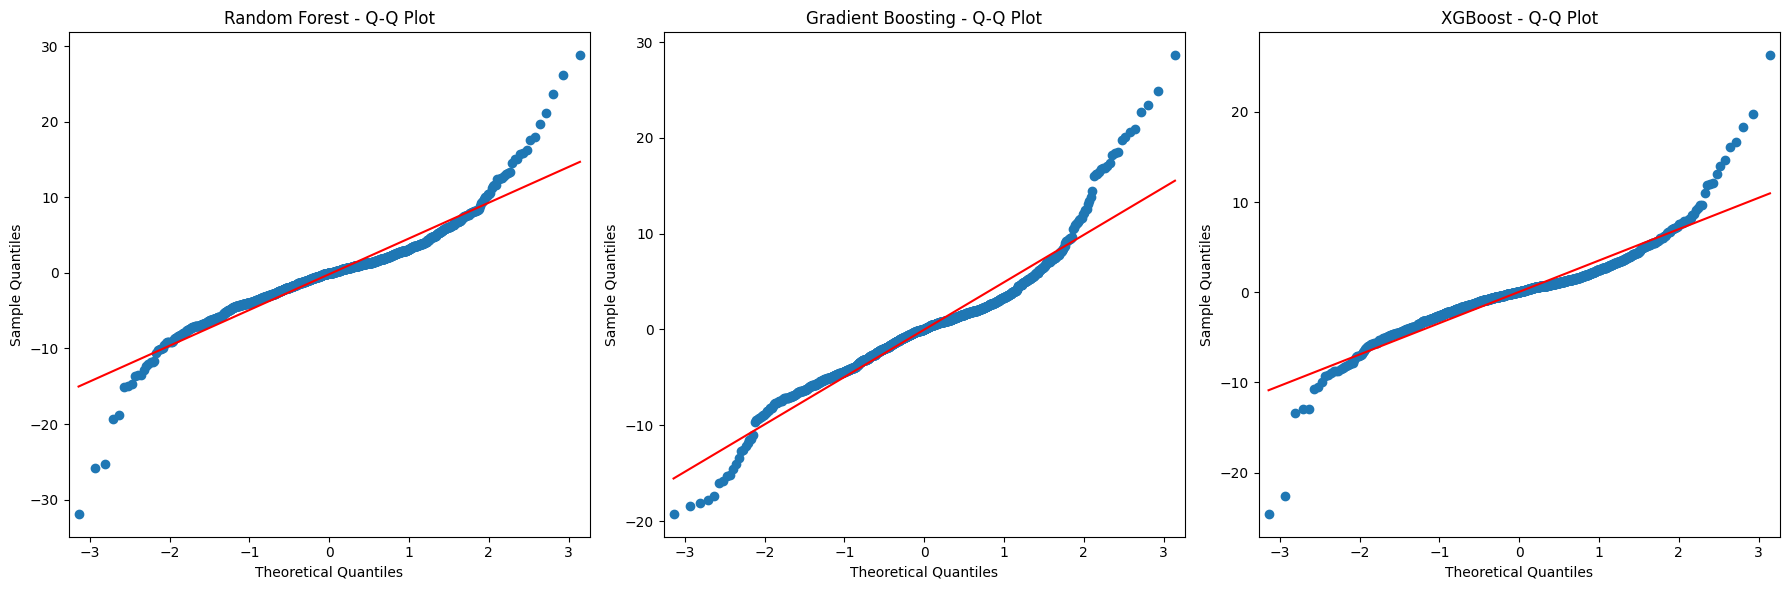

In [8]:
# График распределения ошибок нормальному Q-Q plot
dictionary = {
    'Random Forest': y_test - y_pred_rf,
    'Gradient Boosting': y_test - y_pred_gbr,
    'XGBoost': y_test - y_pred_xgb
}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, res) in enumerate(dictionary.items()):
    ax = axes[i]
    sm.graphics.qqplot(res, line='s', ax=ax)
    ax.set_title(f'{model_name} - Q-Q Plot')

plt.tight_layout()
plt.show()

In [15]:
# Сохранение моделей
import joblib
joblib.dump(model_rf, 'model1_rf.joblib')
joblib.dump(model_gbr, 'model2_gbr.joblib')
model_xgb.save_model('model3_xgb.json')